This notebook explores numerical integration methods using Python.

Date Created: 14 Nov 2018
<br>
Last Modified: 5 May 2021 
<br>
Humans Responsible: JC

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
N = 111
a = -3
b = 3
Delta_x = (b-a)/(N-1)

In [4]:
def my_func1(x):
    return np.exp(-x**2)#x**2 # np.sin(1/(x+0.1)) 

In [5]:
x = np.linspace(a,b,N) # np.arange(a, b+Delta_x, Delta_x)
#x

In [6]:
y = my_func1(x)
#y

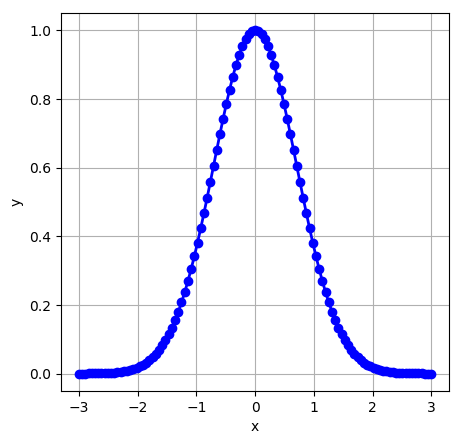

In [7]:
fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'bo-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# 0th order (Riemann sums)

$$
I \approx \Delta x \sum_{n=1}^{N-1} f(x_n)
$$

$$
x_n = a + n\Delta x
$$

In [8]:
Delta_x * np.sum(y[0:N-1])

1.7724143298947608

# 1st order (Trapezoidal rule)

$$
I \approx \frac{1}{2} \Delta x \left( f(x_1) + 2\sum_{n=2}^{N-1} f(x_n) + f(x_N)\right)
$$

In [63]:
Delta_x * (1/2) * (y[0] + 2*np.sum(y[1:N-1]) + y[N-1])

1.7724143298947608

# 2nd order (Simpson's rule)

$$
I \approx \frac{1}{3} \Delta x 
\left( 
f(x_1) 
+ 4 \sum_{\substack{n\text{ odd} \\ 1,\cdots,N-1}} f(x_n) 
+ 2 \sum_{\substack {n\text{ even} \\ 2,\cdots,N-2}} f(x_n) 
+ f(x_N)
\right)
$$

In [64]:
Delta_x * (1/3) * (y[0] + 4*np.sum(y[1:N-1:2]) + 2*np.sum(y[2:N-1:2]) + y[N-1])

1.7724146943505847

# Higher order

https://en.wikipedia.org/wiki/Newton–Cotes_formulas

# Scipy's rule

In [9]:
from scipy.integrate import quad

In [10]:
I = quad(my_func1, a, b)

In [11]:
I

(1.7724146965190428, 6.353644780437984e-11)

In [12]:
np.sqrt(np.pi) # Int_{-inf}^{inf} dx exp(-x^2)

1.7724538509055159

In [13]:
from scipy.integrate import quad_explain

In [14]:
quad_explain()


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
        If the user desires improved integration performance, then f may
        instead be a ``ctypes`` function of the form:

            f(int n, double args[n]),

        where ``args`` is an array of function arguments and ``n`` is the
        length of ``args``. ``f.argtypes`` should be set to
        ``(c_int, c_double)``, and ``f.restype`` should be ``(c_double,)``.
    a : float
        Lower limit of integration (use -numpy.inf for -infinity).
    b : float
        Upper limit of integration (use numpy.inf for +infinity).
    args : tuple, optional
        Extra arguments to pass to `func`.
    full_output :